In [2]:
## For analysis and numerical functions
import pandas as pd
import numpy as np

## For Visualization and EDA
import seaborn as sns
import matplotlib.pyplot as plt

##Extra
import warnings
warnings.filterwarnings(action="ignore")

##Linerar Regreesion

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
##import the Data set

data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.shape

(730, 16)

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

1. Dropping the inreavent columns
a) Instant is unique value for each row i.e row index, we could drop this

2. Dropping the unimportant columns ( which are related to target variable)
'dteday' is redundant variable , As we have year and month we doesn't required this variable.

3. Variable with multiconelirity
a) atemp : as mentioned in Dataset characteristics " temp : temperature in Celsius and atemp: feeling temperature in Celsius". 
these two have highy multiconelirity as confirmed from belowmentioned heat map so lest drop "atemp"

b) casual and registered
casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
        
        As mentioned cnt have sum of both casual and registered"

In [7]:
data['instant'].unique().shape

(730,)

In [8]:
data = data.drop(['instant'], axis = 1)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
data = data.drop(['dteday'], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:>

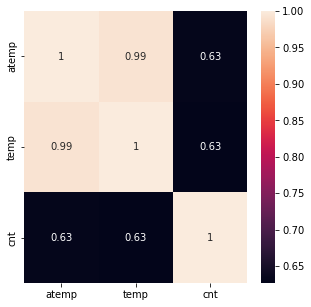

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(data[["atemp","temp","cnt"]].corr(),annot=True)

In [11]:
data = data.drop(['atemp'], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [12]:
data = data.drop(['casual','registered'], axis = 1)

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


####Understanding of Variables
What type of variables we have  acording to data set description
##Binary variable 
A	- yr : year (0: 2018, 1:2019)
B	- holiday : weather day is a holiday or not 
C	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
        
##catagorical variables
A.	-season : season (1:spring, 2:summer, 3:fall, 4:winter)
B.	-mnth : month ( 1 to 12)
C.	- weekday : day of the week
D.	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

##numarical variable
A	- temp : temperature in Celsius
B	- hum: humidity
C	- windspeed: wind speed
    
##Target variavble
	- cnt: count of total rental bikes including both casual and registered
   

 
##Converting catogerical Variable into required formate
#a)-season : season (1:spring, 2:summer, 3:fall, 4:winter)
This is a nominal catagorical variablei.e all seasons are same so we will converte into dummy varables for season(n-1) 
#b)-mnth : month ( 1 to 12)
This is a nominal catagorical variable i.e all months are same so we will converte into dummy varables for months(n-1) 
#c)weekday : day of the week
This is a nominal catagorical variable i.e all weekday are same so we will converte into dummy varables for weekday(n-1) 
D.	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 This is a nominal catagorical variable i.e all weathersit are same so we will converte into dummy varables for weathersit(n-1)

In [14]:
data['season'] = data['season'].astype('category')
data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
data['mnth'] = data['mnth'].astype('category')
data['mnth'].value_counts().sum()

730

In [17]:
data['weekday'] = data['weekday'].astype('category')
data['weekday'].value_counts().sum()

730

In [18]:
data['weathersit'] = data['weathersit'].astype('category')
data['weathersit'].value_counts().sum()

730

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [20]:
data_new1 = pd.get_dummies(data, drop_first= True)

In [21]:
data_new1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [23]:
data_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

##EDA###

##Univariate Analysis

In [24]:
def histgram(x):
    sns.histplot(data[x])

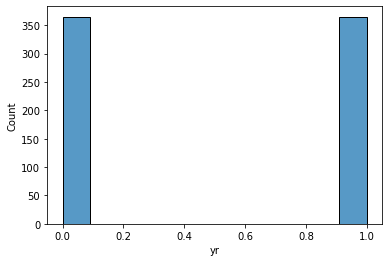

In [25]:
histgram("yr")

In [26]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

<AxesSubplot:xlabel='season', ylabel='count'>

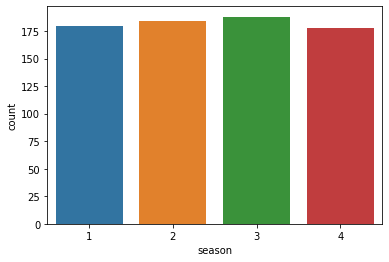

In [28]:
sns.countplot(data["season"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='holiday', ylabel='count'>

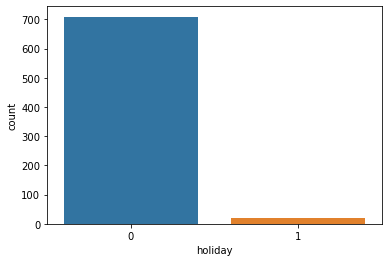

In [29]:
sns.countplot(data["holiday"])
##['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='workingday', ylabel='count'>

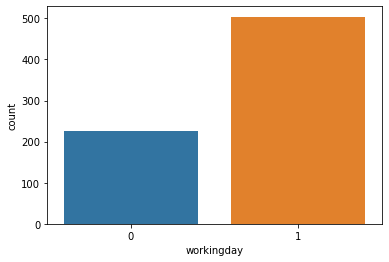

In [30]:
sns.countplot(data['workingday'])
##['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='yr', ylabel='count'>

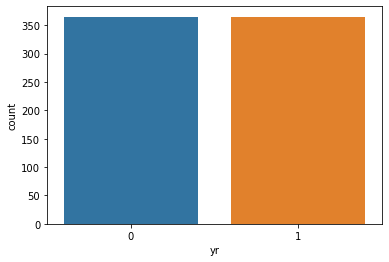

In [31]:
sns.countplot(data["yr"])

<AxesSubplot:xlabel='mnth', ylabel='count'>

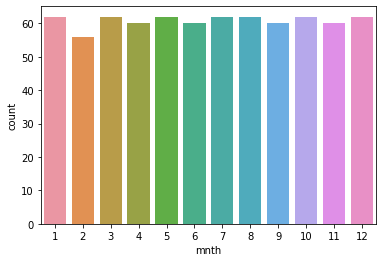

In [32]:
sns.countplot(data["mnth"])

<AxesSubplot:xlabel='weekday', ylabel='count'>

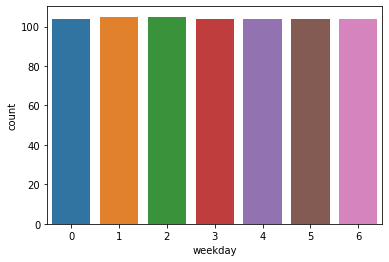

In [33]:
sns.countplot(data["weekday"])
##['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='weathersit', ylabel='count'>

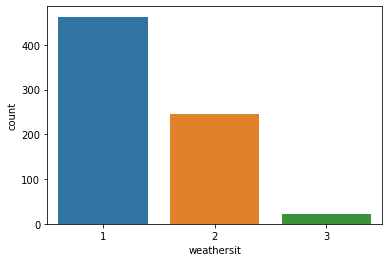

In [34]:
sns.countplot(data['weathersit'])
##['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='temp'>

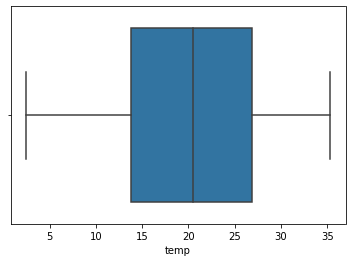

In [35]:
sns.boxplot(data["temp"])

<AxesSubplot:xlabel='hum'>

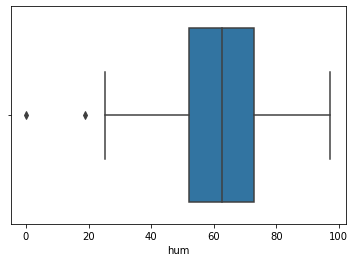

In [36]:
sns.boxplot(data["hum"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='windspeed'>

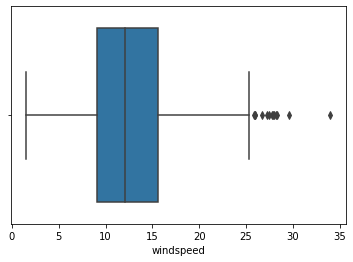

In [37]:
sns.boxplot(data["windspeed"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='cnt'>

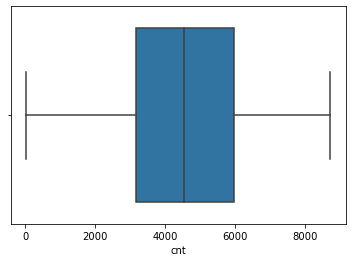

In [38]:
sns.boxplot(data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

In [39]:
##Bivariate Analysis
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='season', ylabel='cnt'>

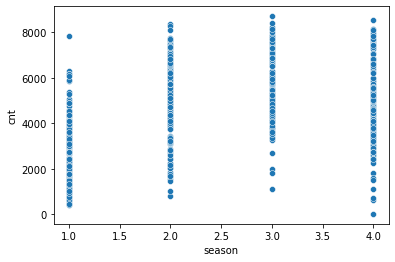

In [40]:
sns.scatterplot(data["season"],data["cnt"])

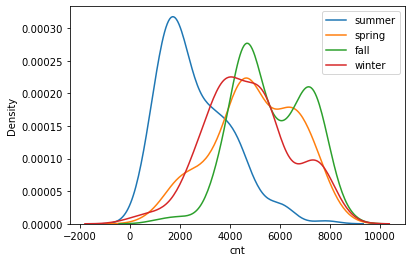

In [41]:
summer= data[ data['season']== 1] 

spring = data[ data['season']== 2]   

fall = data[ data['season']== 3] 

winter = data[ data['season']== 4] 

sns.distplot(summer['cnt'],hist=False,label='summer')
sns.distplot(spring['cnt'],hist=False,label='spring')
sns.distplot(fall['cnt'],hist=False,label='fall')
sns.distplot(winter['cnt'],hist=False,label='winter')
plt.legend()
plt.show()

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

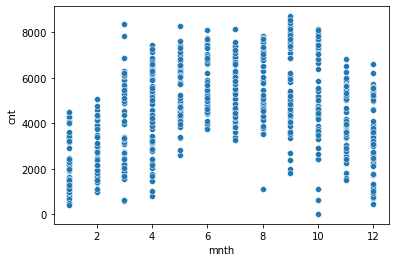

In [42]:
sns.scatterplot(data["mnth"],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

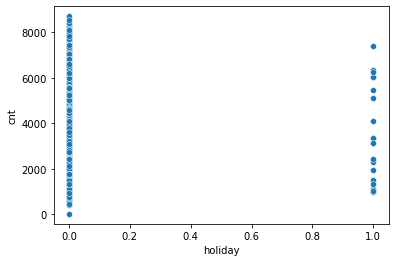

In [43]:
sns.scatterplot(data['holiday'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

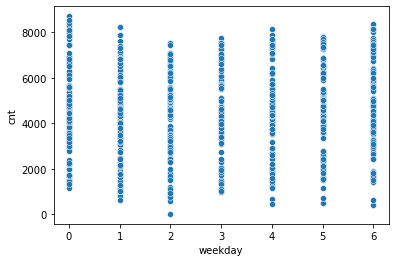

In [44]:
sns.scatterplot(data['weekday'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

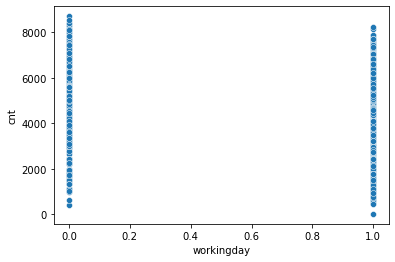

In [45]:
sns.scatterplot(data['workingday'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

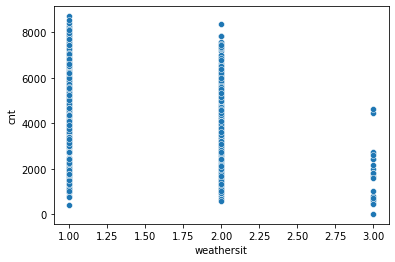

In [46]:
sns.scatterplot(data['weathersit'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='temp', ylabel='cnt'>

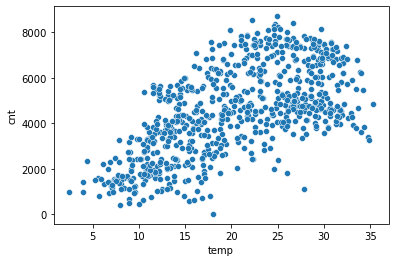

In [47]:
sns.scatterplot(data['temp'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='hum', ylabel='cnt'>

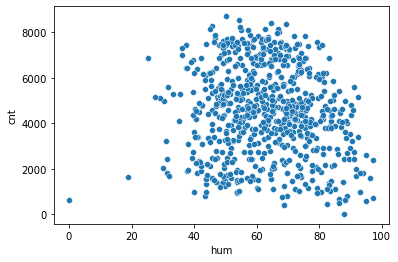

In [48]:
sns.scatterplot(data['hum'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

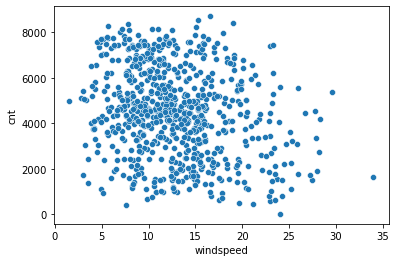

In [49]:
sns.scatterplot(data['windspeed'],data["cnt"])
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

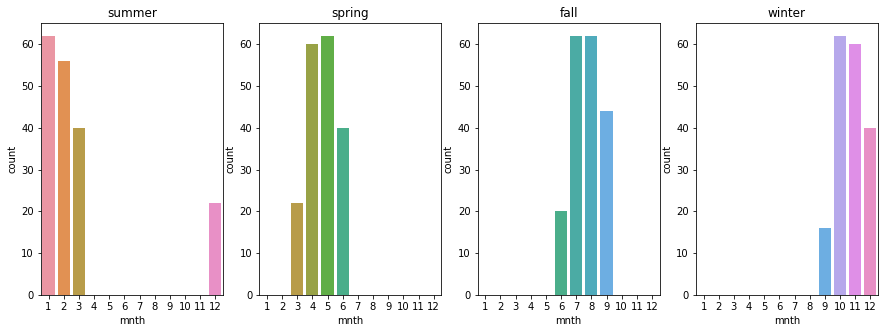

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.title('summer')
sns.countplot(x='mnth',data=summer)

plt.subplot(1,4,2)
plt.title('spring')
sns.countplot(x='mnth',data=spring)


plt.subplot(1,4,3)
plt.title('fall')
sns.countplot(x='mnth',data=fall)

plt.subplot(1,4,4)
plt.title('winter')
sns.countplot(x='mnth',data=winter)

plt.show()

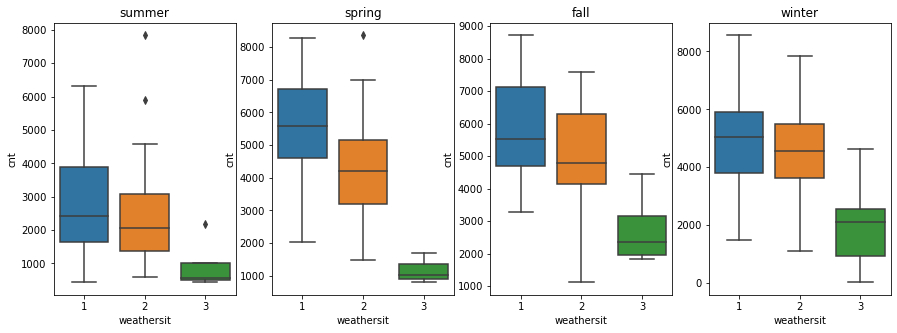

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('summer')
sns.boxplot(x='weathersit',y='cnt',data=summer)

plt.subplot(1,4,2)
plt.title('spring')
sns.boxplot(x='weathersit',y='cnt',data=spring)

plt.subplot(1,4,3)
plt.title('fall')
sns.boxplot(x='weathersit',y='cnt',data=fall)

plt.subplot(1,4,4)
plt.title('winter')
sns.boxplot(x='weathersit',y='cnt',data=winter)

plt.show()

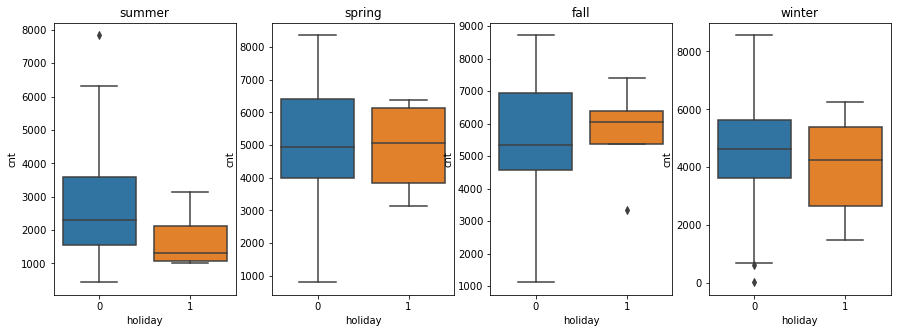

In [52]:
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('summer')
sns.boxplot(x='holiday',y='cnt',data=summer)

plt.subplot(1,4,2)
plt.title('spring')
sns.boxplot(x='holiday',y='cnt',data=spring)

plt.subplot(1,4,3)
plt.title('fall')
sns.boxplot(x='holiday',y='cnt',data=fall)

plt.subplot(1,4,4)
plt.title('winter')
sns.boxplot(x='holiday',y='cnt',data=winter)

plt.show()

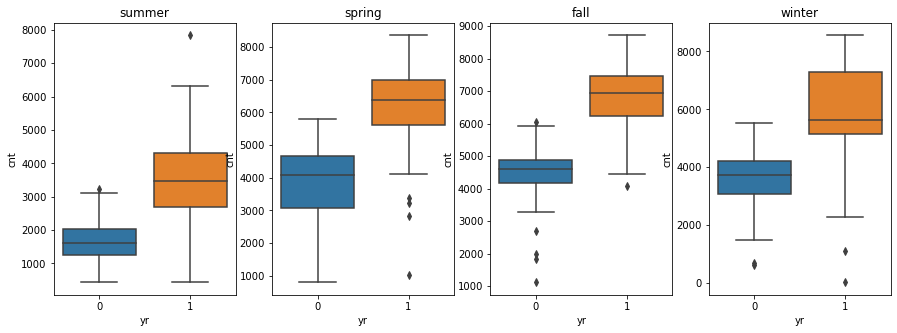

In [110]:
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('summer')
sns.boxplot(x='yr',y='cnt',data=summer)

plt.subplot(1,4,2)
plt.title('spring')
sns.boxplot(x='yr',y='cnt',data=spring)

plt.subplot(1,4,3)
plt.title('fall')
sns.boxplot(x='yr',y='cnt',data=fall)

plt.subplot(1,4,4)
plt.title('winter')
sns.boxplot(x='yr',y='cnt',data=winter)

plt.show()

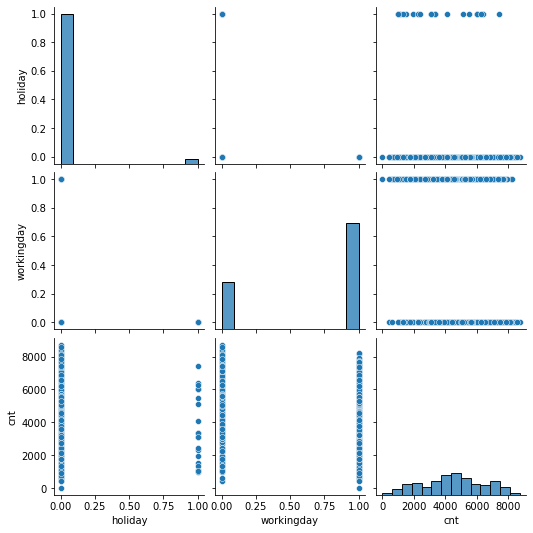

In [53]:
sns.pairplot(data[[ 'holiday', 'workingday',"cnt"]])

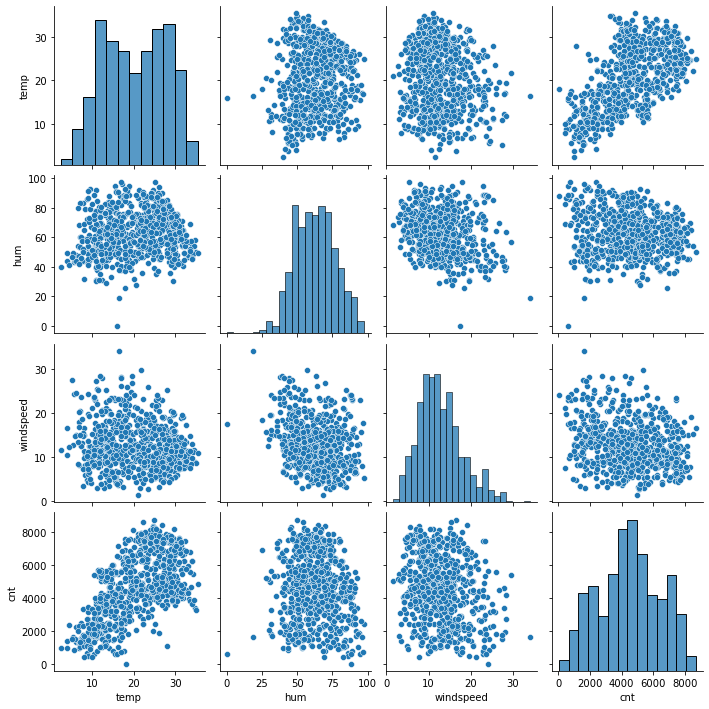

In [54]:
#['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
sns.pairplot(data[[ 'temp', 'hum','windspeed',"cnt"]])

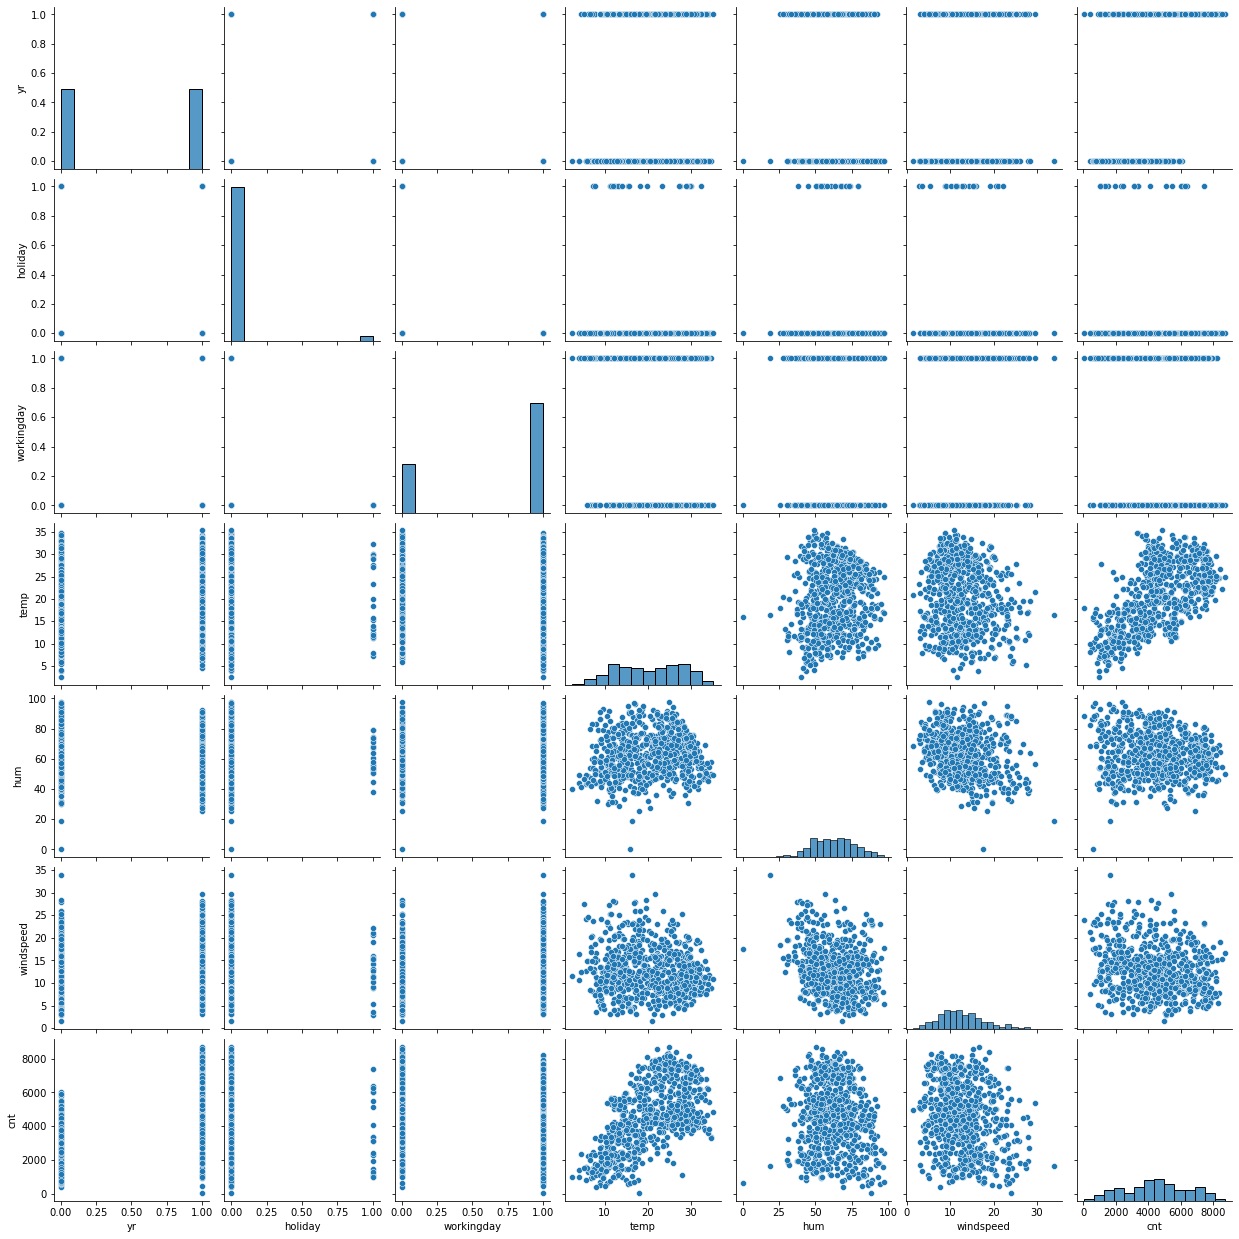

In [55]:
sns.pairplot(data[[ 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']])

<AxesSubplot:>

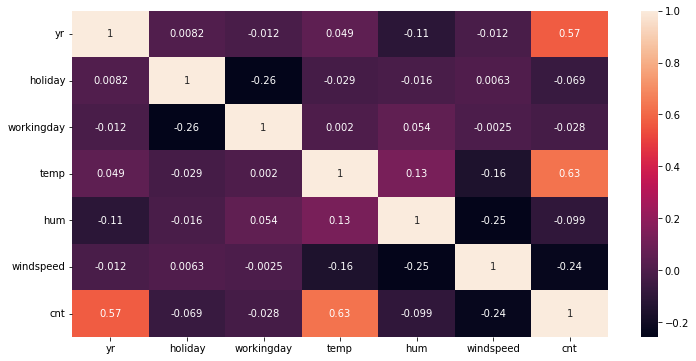

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

<Figure size 800x640 with 0 Axes>

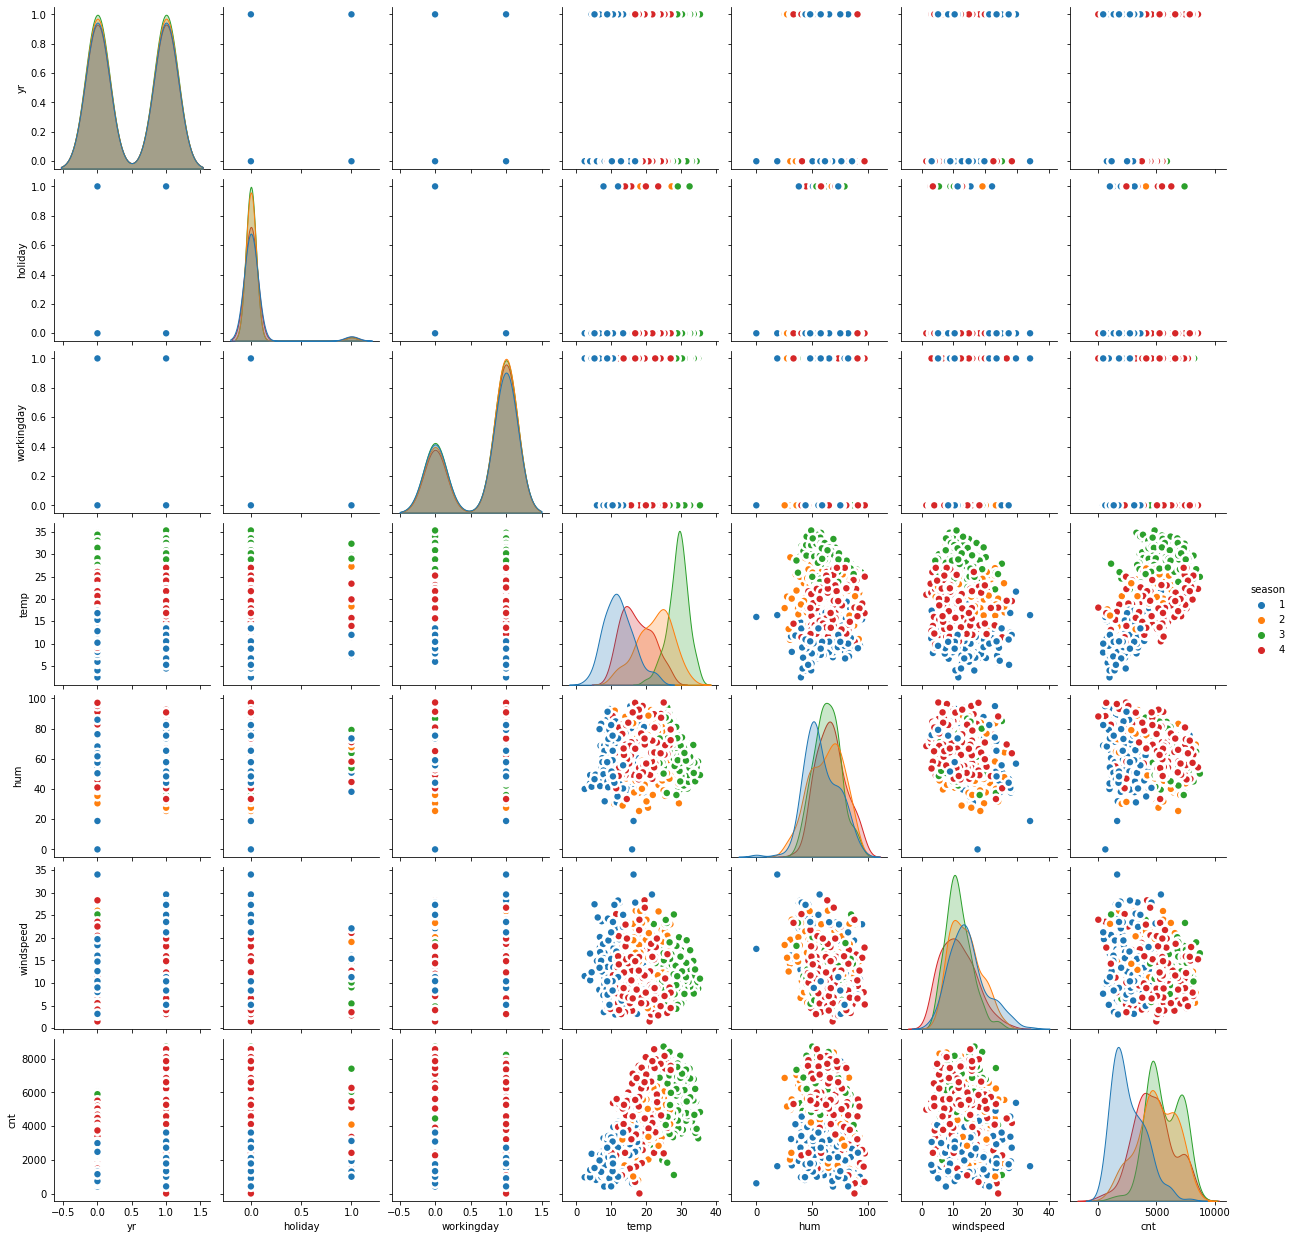

In [57]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="scatter", hue="season", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [59]:
data_new1.info()
##Data Set with dummy variables##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

<AxesSubplot:>

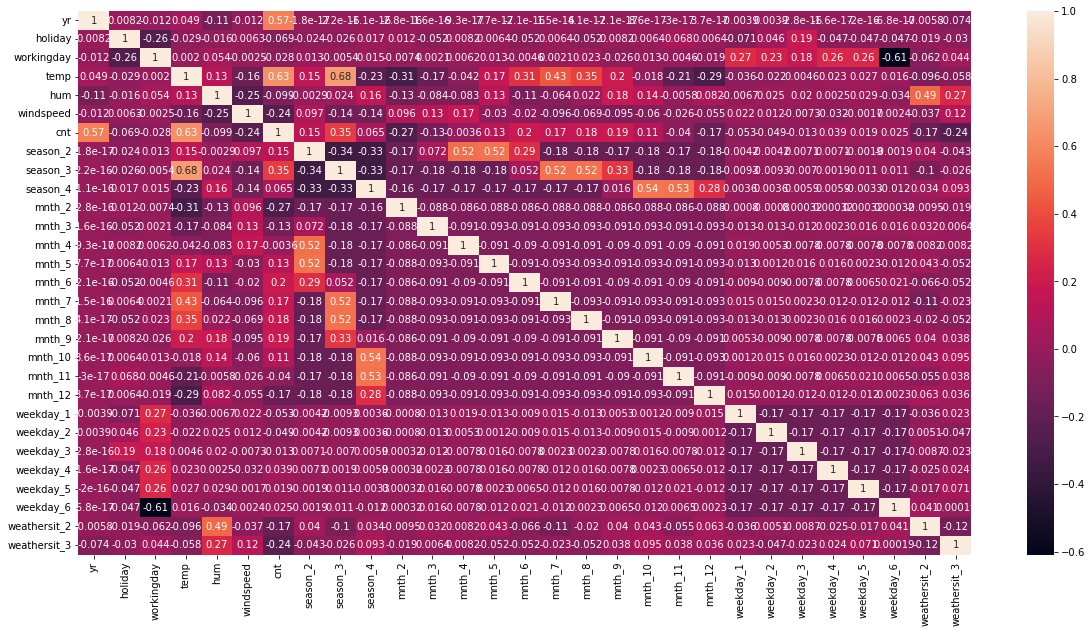

In [60]:
##Data Set with dummy variables##
plt.figure(figsize=(20,10))
sns.heatmap(data_new1.corr(),annot=True)

In [61]:
############# for Test##############33

In [63]:
X = data_new1.drop(['cnt'], axis = 1)
y = data['cnt']

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
xtrain.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
239,0,0,1,28.989419,56.1765,20.412153,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
97,0,0,0,13.769153,83.6250,15.208464,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
503,1,0,0,24.600000,45.6250,5.626325,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
642,1,0,0,25.215000,62.7500,7.125450,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
498,1,0,1,23.506653,78.9583,14.250364,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [66]:
ytrain.head()

239    4334
97     1471
503    8294
642    8156
498    2843
Name: cnt, dtype: int64

In [67]:
#Standard Scaler
xtrain=(xtrain-xtrain.mean())/xtrain.std()

In [68]:
ytrain=(ytrain-ytrain.mean())/ytrain.std()

In [69]:
xtrain.shape

(584, 28)

In [70]:
xtrain.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
239,-0.988930,-0.167693,0.664243,1.168796,-0.459610,1.492912,-0.592663,1.722701,-0.576856,-0.278133,-0.312373,-0.302377,-0.315659,-0.302377,-0.292157,3.265228,-0.274549,-0.315659,-0.305733,-0.309065,-0.403815,2.437660,-0.395181,-0.423663,-0.409527,-0.406676,-0.710134,-0.156587
97,-0.988930,-0.167693,-1.502896,-0.848532,1.497384,0.480361,1.684410,-0.579490,-0.576856,-0.278133,-0.312373,3.301465,-0.315659,-0.302377,-0.292157,-0.305733,-0.274549,-0.315659,-0.305733,-0.309065,-0.403815,-0.409527,-0.395181,-0.423663,-0.409527,-0.406676,1.405775,-0.156587
503,1.009462,-0.167693,-1.502896,0.587013,-1.211900,-1.384163,1.684410,-0.579490,-0.576856,-0.278133,-0.312373,-0.302377,3.162548,-0.302377,-0.292157,-0.305733,-0.274549,-0.315659,-0.305733,-0.309065,-0.403815,-0.409527,-0.395181,-0.423663,-0.409527,-0.406676,-0.710134,-0.156587
642,1.009462,-0.167693,-1.502896,0.668526,0.009060,-1.092459,-0.592663,-0.579490,1.730567,-0.278133,-0.312373,-0.302377,-0.315659,-0.302377,-0.292157,-0.305733,-0.274549,3.162548,-0.305733,-0.309065,-0.403815,-0.409527,-0.395181,-0.423663,-0.409527,2.454752,-0.710134,-0.156587
498,1.009462,-0.167693,0.664243,0.442098,1.164663,0.293930,1.684410,-0.579490,-0.576856,-0.278133,-0.312373,-0.302377,3.162548,-0.302377,-0.292157,-0.305733,-0.274549,-0.315659,-0.305733,-0.309065,-0.403815,2.437660,-0.395181,-0.423663,-0.409527,-0.406676,1.405775,-0.156587


In [71]:
ytrain.shape

(584,)

In [72]:
ytrain.head()

239   -0.083816
97    -1.597621
503    2.010024
642    1.937057
498   -0.872179
Name: cnt, dtype: float64

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(xtrain,ytrain)
selector.support_

array([ True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True])

In [74]:
xtrain.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'], dtype='object')

In [76]:
xtrain=xtrain[['yr',  'temp', 'hum', 'windspeed', 'season_2', 
'season_3', 'season_4', 'mnth_3', 
'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10','weathersit_2',
'weathersit_3']]

In [77]:
xtrain

,yr,temp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
239,-0.988930,1.168796,-0.459610,1.492912,-0.592663,1.722701,-0.576856,-0.312373,-0.302377,-0.315659,3.265228,-0.274549,-0.315659,-0.710134,-0.156587
97,-0.988930,-0.848532,1.497384,0.480361,1.684410,-0.579490,-0.576856,-0.312373,3.301465,-0.315659,-0.305733,-0.274549,-0.315659,1.405775,-0.156587
503,1.009462,0.587013,-1.211900,-1.384163,1.684410,-0.579490,-0.576856,-0.312373,-0.302377,3.162548,-0.305733,-0.274549,-0.315659,-0.710134,-0.156587
642,1.009462,0.668526,0.009060,-1.092459,-0.592663,-0.579490,1.730567,-0.312373,-0.302377,-0.315659,-0.305733,-0.274549,3.162548,-0.710134,-0.156587
498,1.009462,0.442098,1.164663,0.293930,1.684410,-0.579490,-0.576856,-0.312373,-0.302377,3.162548,-0.305733,-0.274549,-0.315659,1.405775,-0.156587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.009462,-0.585874,1.990524,-0.419419,-0.592663,-0.579490,1.730567,-0.312373,-0.302377,-0.315659,-0.305733,-0.274549,-0.315659,1.405775,-0.156587
192,-0.988930,1.642161,-0.478133,0.131775,-0.592663,1.722701,-0.576856,-0.312373,-0.302377,-0.315659,-0.305733,-0.274549,-0.315659,-0.710134,-0.156587
629,1.009462,0.858724,0.145715,1.218142,-0.592663,1.722701,-0.576856,-0.312373,-0.302377,-0.315659,-0.305733,3.636100,-0.315659,-0.710134,-0.156587
559,1.009462,1.148548,0.520024,-0.605798,-0.592663,1.722701,-0.576856,-0.312373,-0.302377,-0.315659,-0.305733,-0.274549,-0.315659,1.405775,-0.156587


In [78]:
import statsmodels.api as sm
xtrain=sm.add_constant(xtrain)
model1=sm.OLS(ytrain,xtrain)
result1=model1.fit()

In [79]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     182.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.04e-205
Time:                        21:50:15   Log-Likelihood:                -314.03
No. Observations:                 584   AIC:                             660.1
Df Residuals:                     568   BIC:                             730.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.527e-16      0.017   8.78e-15      1.000      -0.034       0.034
yr               0.5133      0.018     28.791      0.000       0.478       0.548
temp             0.4860      0.035     13.885      0.000       0.417       0.555
hum             -0.1505      0.026     -5.884      0.000      -0.201      -0.100
windspeed       -0.1279      0.019     -6.663      0.000      -0.166      -0.090
season_2         0.2371      0.038      6.201      0.000       0.162       0.312
season_3         0.1470      0.044      3.316      0.001       0.060       0.234
season_4         0.3049      0.027     11.331      0.000       0.252       0.358
mnth_3           0.0647      0.020      3.273      0.001       0.026       0.103
mnth_4           0.0286      0.025      1.129      0.259      -0.021       0.078
mnth_5           0.0625      0.025      2.457      0.014       0.013       0.112
mnth_8           0.0517      0.022      2.358      0.019       0.009       0.095
mnth_9           0.1359      0.021      6.625      0.000       0.096       0.176
mnth_10          0.0807      0.022      3.702      0.000       0.038       0.124
weathersit_2    -0.0902      0.022     -4.044      0.000      -0.134      -0.046
weathersit_3    -0.1348      0.020     -6.618      0.000      -0.175      -0.095
==============================================================================
Omnibus:                      101.443   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.167
Skew:                          -0.884   Prob(JB):                     8.70e-57
Kurtosis:                       5.735   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.050234
2,temp,4.046895
3,hum,2.161415
4,windspeed,1.218269
5,season_2,4.828885
6,season_3,6.495773
7,season_4,2.391401
8,mnth_3,1.290201
9,mnth_4,2.122927


In [81]:
xtrain=xtrain.drop(['season_3'],axis=1)

In [82]:
model2=sm.OLS(ytrain,xtrain)
result2=model2.fit()

In [83]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.66e-204
Time:                        21:51:26   Log-Likelihood:                -319.63
No. Observations:                 584   AIC:                             669.3
Df Residuals:                     569   BIC:                             734.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.527e-16      0.018   8.71e-15      1.000      -0.034       0.034
yr               0.5072      0.018     28.354      0.000       0.472       0.542
temp             0.5758      0.022     25.757      0.000       0.532       0.620
hum             -0.1591      0.026     -6.198      0.000      -0.210      -0.109
windspeed       -0.1322      0.019     -6.841      0.000      -0.170      -0.094
season_2         0.1627      0.031      5.210      0.000       0.101       0.224
season_4         0.2641      0.024     10.941      0.000       0.217       0.311
mnth_3           0.0565      0.020      2.857      0.004       0.018       0.095
mnth_4           0.0392      0.025      1.547      0.122      -0.011       0.089
mnth_5           0.0568      0.026      2.219      0.027       0.007       0.107
mnth_8           0.0772      0.021      3.726      0.000       0.036       0.118
mnth_9           0.1581      0.020      8.082      0.000       0.120       0.197
mnth_10          0.0672      0.022      3.111      0.002       0.025       0.110
weathersit_2    -0.0862      0.022     -3.836      0.000      -0.130      -0.042
weathersit_3    -0.1307      0.021     -6.372      0.000      -0.171      -0.090
==============================================================================
Omnibus:                       87.025   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.367
Skew:                          -0.805   Prob(JB):                     2.29e-43
Kurtosis:                       5.340   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.038811
2,temp,1.622542
3,hum,2.139211
4,windspeed,1.212787
5,season_2,3.164244
6,season_4,1.891427
7,mnth_3,1.270057
8,mnth_4,2.089001
9,mnth_5,2.127698


In [85]:
predicted_value1=result2.predict(xtrain)

In [86]:
result2.params

const           1.526557e-16
yr              5.071685e-01
temp            5.757924e-01
hum            -1.590848e-01
windspeed      -1.322196e-01
season_2        1.626527e-01
season_4        2.640750e-01
mnth_3          5.649666e-02
mnth_4          3.924978e-02
mnth_5          5.681656e-02
mnth_8          7.716729e-02
mnth_9          1.581471e-01
mnth_10         6.720222e-02
weathersit_2   -8.622642e-02
weathersit_3   -1.306980e-01
dtype: float64

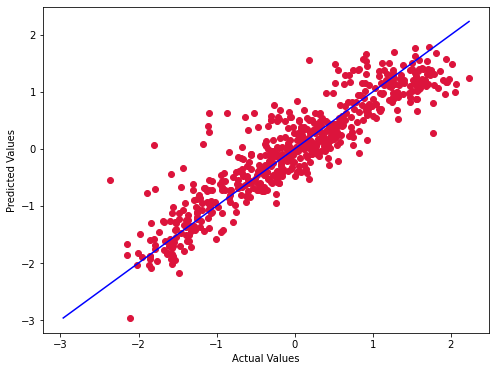

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(ytrain, predicted_value1, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(predicted_value1), max(ytrain))
p2 = min(min(predicted_value1), min(ytrain))
plt.plot([p1, p2], [p1, p2], 'b-')

In [88]:
## Predictions on Test Data
xtest=(xtest-xtest.mean())/xtest.std()

In [89]:
ytest=(ytest-ytest.mean())/ytest.std()

In [90]:
xtrain.shape

(584, 15)

In [91]:
xtrain.head()

,const,yr,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
239,1.0,-0.988930,1.168796,-0.459610,1.492912,-0.592663,-0.576856,-0.312373,-0.302377,-0.315659,3.265228,-0.274549,-0.315659,-0.710134,-0.156587
97,1.0,-0.988930,-0.848532,1.497384,0.480361,1.684410,-0.576856,-0.312373,3.301465,-0.315659,-0.305733,-0.274549,-0.315659,1.405775,-0.156587
503,1.0,1.009462,0.587013,-1.211900,-1.384163,1.684410,-0.576856,-0.312373,-0.302377,3.162548,-0.305733,-0.274549,-0.315659,-0.710134,-0.156587
642,1.0,1.009462,0.668526,0.009060,-1.092459,-0.592663,1.730567,-0.312373,-0.302377,-0.315659,-0.305733,-0.274549,3.162548,-0.710134,-0.156587
498,1.0,1.009462,0.442098,1.164663,0.293930,1.684410,-0.576856,-0.312373,-0.302377,3.162548,-0.305733,-0.274549,-0.315659,1.405775,-0.156587


In [92]:
xtest.shape

(146, 28)

In [93]:
xtest=xtest[['yr',  'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_3', 
'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10','weathersit_2',
'weathersit_3']]

In [94]:
xtest.shape

(146, 14)

In [95]:
xtest=sm.add_constant(xtest)

In [96]:
xtest.shape

(146, 15)

In [97]:
xtest.head()

,const,yr,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
196,1.0,-1.038402,0.985489,-0.320320,0.202441,-0.527995,-0.527995,-0.270233,-0.28447,-0.255428,-0.298226,-0.385463,-0.255428,-0.719212,-0.22364
187,1.0,-1.038402,1.338862,0.118661,-0.403496,-0.527995,-0.527995,-0.270233,-0.28447,-0.255428,-0.298226,-0.385463,-0.255428,-0.719212,-0.22364
14,1.0,-1.038402,-1.543938,-0.891823,-0.418749,-0.527995,-0.527995,-0.270233,-0.28447,-0.255428,-0.298226,-0.385463,-0.255428,1.380887,-0.22364
31,1.0,-1.038402,-1.773589,1.300199,-1.710351,-0.527995,-0.527995,-0.270233,-0.28447,-0.255428,-0.298226,-0.385463,-0.255428,1.380887,-0.22364
390,1.0,0.956423,-0.939476,0.902750,-1.461490,-0.527995,-0.527995,-0.270233,-0.28447,-0.255428,-0.298226,-0.385463,-0.255428,1.380887,-0.22364


In [106]:
ytest.shape

(146,)

In [98]:
predicted_value_test=result2.predict(xtest)

In [99]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.66e-204
Time:                        21:54:43   Log-Likelihood:                -319.63
No. Observations:                 584   AIC:                             669.3
Df Residuals:                     569   BIC:                             734.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.527e-16      0.018   8.71e-15      1.000      -0.034       0.034
yr               0.5072      0.018     28.354      0.000       0.472       0.542
temp             0.5758      0.022     25.757      0.000       0.532       0.620
hum             -0.1591      0.026     -6.198      0.000      -0.210      -0.109
windspeed       -0.1322      0.019     -6.841      0.000      -0.170      -0.094
season_2         0.1627      0.031      5.210      0.000       0.101       0.224
season_4         0.2641      0.024     10.941      0.000       0.217       0.311
mnth_3           0.0565      0.020      2.857      0.004       0.018       0.095
mnth_4           0.0392      0.025      1.547      0.122      -0.011       0.089
mnth_5           0.0568      0.026      2.219      0.027       0.007       0.107
mnth_8           0.0772      0.021      3.726      0.000       0.036       0.118
mnth_9           0.1581      0.020      8.082      0.000       0.120       0.197
mnth_10          0.0672      0.022      3.111      0.002       0.025       0.110
weathersit_2    -0.0862      0.022     -3.836      0.000      -0.130      -0.042
weathersit_3    -0.1307      0.021     -6.372      0.000      -0.171      -0.090
==============================================================================
Omnibus:                       87.025   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.367
Skew:                          -0.805   Prob(JB):                     2.29e-43
Kurtosis:                       5.340   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

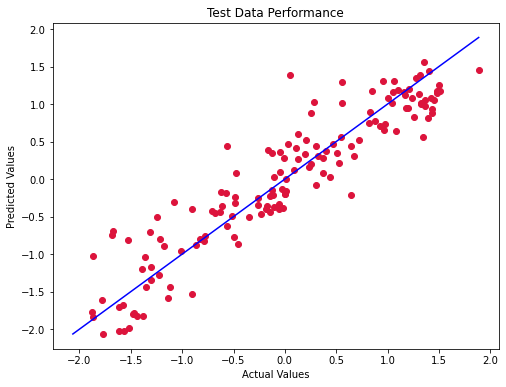

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(ytest, predicted_value_test, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Data Performance")
p1 = max(max(predicted_value_test), max(ytest))
p2 = min(min(predicted_value_test), min(ytest))
plt.plot([p1, p2], [p1, p2], 'b-')

Model Interpretation


A) Result 1 with train 

OLS Regression Results
Dep. Variable:	cnt	R-squared:	0.828
Model:	OLS	Adj. R-squared:	0.824
Method:	Least Squares	F-statistic:	182.4
Date:	Tue, 05 Apr 2022	Prob (F-statistic):	1.04e-205
Time:	21:50:15	Log-Likelihood:	-314.03
No. Observations:	584	AIC:	660.1
Df Residuals:	568	BIC:	730.0
Df Model:	15		
Covariance Type:	nonrobust		

Note:- VIf for season_3 was  6.495773 so we drop this parametere before runing second model.

 B) Result 2

1. Result2 with train:-

OLS Regression Results
Dep. Variable:	cnt	R-squared:	0.825
Model:	OLS	Adj. R-squared:	0.820
Method:	Least Squares	F-statistic:	191.3
Date:	Tue, 05 Apr 2022	Prob (F-statistic):	1.66e-204
Time:	21:51:26	Log-Likelihood:	-319.63
No. Observations:	584	AIC:	669.3
Df Residuals:	569	BIC:	734.8
Df Model:	14		
Covariance Type:	nonrobust		


2. Result2 with test:- 
    
OLS Regression Results
Dep. Variable:	cnt	R-squared:	0.825
Model:	OLS	Adj. R-squared:	0.820
Method:	Least Squares	F-statistic:	191.3
Date:	Tue, 05 Apr 2022	Prob (F-statistic):	1.66e-204
Time:	21:54:43	Log-Likelihood:	-319.63
No. Observations:	584	AIC:	669.3
Df Residuals:	569	BIC:	734.8
Df Model:	14		
Covariance Type:	nonrobust		



Insights From the result2 model summary, 

A) it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

B) F Statistics :

F-statistic: 191.3
Prob (F-statistic): 1.66e-204
The F-Statistics value of 191.3 (which is greater than 1) and
the p-value is "Prob (F-statistic):	1.66e-204"  of aprox'~0.0000' which is less than 0.05
implies that the overall model is significant

In [101]:
result2.params

const           1.526557e-16
yr              5.071685e-01
temp            5.757924e-01
hum            -1.590848e-01
windspeed      -1.322196e-01
season_2        1.626527e-01
season_4        2.640750e-01
mnth_3          5.649666e-02
mnth_4          3.924978e-02
mnth_5          5.681656e-02
mnth_8          7.716729e-02
mnth_9          1.581471e-01
mnth_10         6.720222e-02
weathersit_2   -8.622642e-02
weathersit_3   -1.306980e-01
dtype: float64

The equation of best fitted surface based on Result2:
    
Y=C+MX

y=1.526557e-16 + yr * 5.071685e-01 + temp * 5.757924e-01 + hum * 1.590848e-01 + windspeed * -1.322196e-01 + 
season_2 * 1.626527e-01 + season_4 * 2.640750e-01 + mnth_3 * 5.649666e-02 + mnth_4 * 3.924978e-02 + mnth_5 * 5.681656e-02
+ mnth_8 * 7.716729e-02 + mnth_9 * 1.581471e-01 + mnth_10 * 6.720222e-02 + weathersit_2 * -8.622642e-02 
+ weathersit_3 * -1.306980e-01

Interpretation of Coefficients:
   + a Coefficients means a unit increase in variable, increases the bike hire numbers by a units.
   - a Coefficients means a unit increase in variable, decreases the bike hire numbers by a units

Ex:-  temp: a unit increase in temp variable,increases the bike hire numbers by 0.5636 units.

Ex:- weathersit_3: A coefficient value of ‘-250.061877’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

        
const           1.526557e-16  

Positive relation
This parameteres are link with number of bike hire positiveliy so a uinit increse in thise parameteres are goinge to give
increases the bike hire numbers by a units.

yr              5.071685e-01
temp            5.757924e-01
season_2        1.626527e-01
season_4        2.640750e-01
mnth_3          5.649666e-02
mnth_4          3.924978e-02
mnth_5          5.681656e-02
mnth_8          7.716729e-02
mnth_9          1.581471e-01
mnth_10         6.720222e-02


Negitive relation

This parameteres are link with number of bike hire negitively so a uinit increse in thise parameteres are goinge to give
increases the bike hire numbers by a units.

hum            -1.590848e-01
windspeed      -1.322196e-01
weathersit_2   -8.622642e-02
weathersit_3   -1.306980e-01

In [107]:
from sklearn.metrics import r2_score
r2=r2_score(ytest, ytest, predicted_value_test)

In [108]:
r2 #value of R2

1.0